In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
#loading data
variance = pd.read_csv('variance_ml.csv')
rfe = pd.read_csv('rfe.csv')
chi = pd.read_csv('chi.csv')
network = pd.read_csv('toR2.csv')

open_ = pd.read_csv('ed_total.csv')
labels = open_.open

In [80]:
# adding networks data 
variance_networks =pd.merge(variance,network,how='left',on='business_id')
rfe_networks =  rfe.merge(network,how='left',on='business_id')
chi_networks = chi.merge(network,how='left',on='business_id')

In [81]:
#removing unuseful columns 
variance_networks  = variance_networks.drop(['Unnamed: 0_x','Unnamed: 0_y','open','business_id'],axis=1)
chi_networks  = chi_networks.drop(['Unnamed: 0_x','Unnamed: 0_y','open','business_id'],axis=1)
rfe_networks  = rfe_networks.drop(['Unnamed: 0_x','Unnamed: 0_y','open','business_id'],axis=1)
variance= variance.drop(['business_id','Unnamed: 0'],axis=1)
chi= chi.drop(['business_id','Unnamed: 0'],axis=1)
rfe= rfe.drop(['business_id','Unnamed: 0'],axis=1)

In [83]:
# deal NA data, simply fill in 0
variance =variance.fillna(0)
rfe = rfe.fillna(0)
chi = chi.fillna(0)
variance_networks =variance_networks.fillna(0)
rfe_networks = rfe_networks.fillna(0)
chi_networks = chi_networks.fillna(0)

In [84]:
#prepare train and validation data
X_train_var, X_test_var, y_train_var, y_test_var = train_test_split(variance, labels, test_size=0.25, random_state=42)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(rfe, labels, test_size=0.25, random_state=42)
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(chi, labels, test_size=0.25, random_state=42)
X_train_var_n, X_test_var_n, y_train_var_n, y_test_var_n = train_test_split(variance_networks, labels, test_size=0.25, random_state=42)
X_train_rfe_n, X_test_rfe_n, y_train_rfe_n, y_test_rfe_n = train_test_split(rfe_networks, labels, test_size=0.25, random_state=42)
X_train_chi_n, X_test_chi_n, y_train_chi_n, y_test_chi_n = train_test_split(chi_networks, labels, test_size=0.25, random_state=42)

# Logistic Regression

In [85]:

from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


lg_var = LogisticRegression().fit(X_train_var,y_train_var)
lg_var_n = LogisticRegression().fit(X_train_var_n,y_train_var_n)
lg_chi = LogisticRegression().fit(X_train_chi,y_train_chi) 
lg_chi_n = LogisticRegression().fit(X_train_chi_n,y_train_chi_n) 
lg_rfe = LogisticRegression().fit(X_train_rfe,y_train_rfe) 
lg_rfe_n = LogisticRegression().fit(X_train_rfe_n,y_train_rfe_n) 




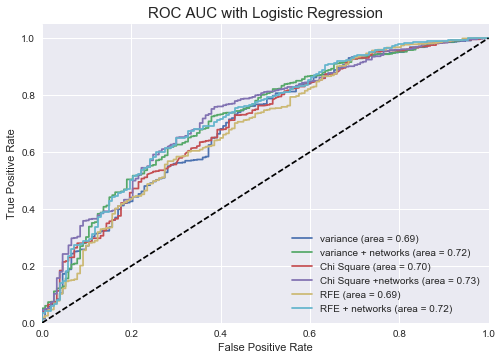

In [94]:
fpr_v, tpr_v, _ = roc_curve(y_test_var,lg_var.predict_proba(X_test_var)[:,1])
roc_auc_v = auc(fpr_v, tpr_v)

fpr_v_n, tpr_v_n, _ = roc_curve(y_test_var_n,lg_var_n.predict_proba(X_test_var_n)[:,1])
roc_auc_v_n = auc(fpr_v_n, tpr_v_n)

fpr_d, tpr_d, _ = roc_curve(y_test_chi,lg_chi.predict_proba(X_test_chi)[:,1])
roc_auc_d = auc(fpr_d, tpr_d)

fpr_d_n, tpr_d_n, _ = roc_curve(y_test_chi_n,lg_chi_n.predict_proba(X_test_chi_n)[:,1])
roc_auc_d_n = auc(fpr_d_n, tpr_d_n)

fpr_q, tpr_q, _ = roc_curve(y_test_var,lg_rfe.predict_proba(X_test_rfe)[:,1])
roc_auc_q = auc(fpr_q, tpr_q)

fpr_q_n, tpr_q_n, _ = roc_curve(y_test_var_n,lg_rfe_n.predict_proba(X_test_rfe_n)[:,1])
roc_auc_q_n = auc(fpr_q_n, tpr_q_n)

plt.figure()
#plt.plot(fpr_g, tpr_g, label='Bas_Model (area = %0.2f)' % roc_auc_g)
plt.plot(fpr_v, tpr_v, label='variance (area = %0.2f)' % roc_auc_v)
plt.plot(fpr_v_n, tpr_v_n, label='variance + networks (area = %0.2f)' % roc_auc_v_n)
plt.plot(fpr_d, tpr_d, label='Chi Square (area = %0.2f)' % roc_auc_d)
plt.plot(fpr_d_n, tpr_d_n, label='Chi Square +networks (area = %0.2f)' % roc_auc_d_n)
plt.plot(fpr_q, tpr_q, label='RFE (area = %0.2f)' % roc_auc_q)
plt.plot(fpr_q_n, tpr_q_n, label='RFE + networks (area = %0.2f)' % roc_auc_q_n)




plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC with Logistic Regression',fontsize=15)
plt.legend(loc="lower right")
plt.show()

In [24]:
confusion_matrix(y_test_rfe_n,lg_rfe_n.predict(X_test_rfe_n))*4

array([[ 112,  500],
       [  48, 2700]])

In [37]:
val(y_test_rfe_n,lg_rfe_n,X_test_rfe_n)

             precision    recall  f1-score   support

      False       0.70      0.18      0.29       153
       True       0.84      0.98      0.91       687

avg / total       0.82      0.84      0.80       840

0.836904761905
0.724186812037


# MLP

In [117]:
from sklearn.neural_network import MLPClassifier

#knn_base = MLPClassifier(activation='logistic',learning_rate='adaptive').fit(X_train_base,y_train_base) 
mlp_var = MLPClassifier().fit(X_train_var,y_train_var) 
mlp_rfe = MLPClassifier().fit(X_train_rfe,y_train_rfe) 
mlp_chi = MLPClassifier().fit(X_train_chi,y_train_chi) 

mlp_var_n = MLPClassifier().fit(X_train_var_n,y_train_var_n) 
mlp_rfe_n = MLPClassifier().fit(X_train_rfe_n,y_train_rfe_n) 
mlp_chi_n = MLPClassifier().fit(X_train_chi_n,y_train_chi_n) 

In [52]:
x=[]
auc_r_rfe=[]
auc_r_var=[]
auc_r_chi=[]
auc_r_rfe_n =[]
auc_r_var_n=[]
auc_r_chi_n=[]

for i in range(1,130,2):
    mpc_rfe = MLPClassifier(learning_rate_init=i/1000).fit(X_train_rfe,y_train_rfe) 
    mpc_rfe_n = MLPClassifier(learning_rate_init=i/1000).fit(X_train_rfe_n,y_train_rfe_n)
    mpc_chi = MLPClassifier(learning_rate_init=i/1000).fit(X_train_chi,y_train_chi) 
    mpc_chi_n =MLPClassifier(learning_rate_init=i/1000).fit(X_train_chi_n,y_train_chi_n) 
    mpc_var = MLPClassifier(learning_rate_init=i/1000).fit(X_train_var,y_train_var) 
    mpc_var_n = MLPClassifier(learning_rate_init=i/1000).fit(X_train_var_n,y_train_var_n)
    
    fpr_rfe, tpr_rfe, _ = roc_curve(y_test_rfe,mpc_rfe.predict_proba(X_test_rfe)[:,1])
    auc_r_rfe.append(auc(fpr_rfe, tpr_rfe))
    
    fpr_rfe_n, tpr_rfe_n, _ = roc_curve(y_test_rfe_n,mpc_rfe_n.predict_proba(X_test_rfe_n)[:,1])
    auc_r_rfe_n.append(auc(fpr_rfe_n, tpr_rfe_n))
    
    fpr_var, tpr_var, _ = roc_curve(y_test_var,mpc_var.predict_proba(X_test_var)[:,1])
    auc_r_var.append(auc(fpr_var, tpr_var))
    
    fpr_var_n, tpr_var_n, _ = roc_curve(y_test_var_n,mpc_var_n.predict_proba(X_test_var_n)[:,1])
    auc_r_var_n.append(auc(fpr_var_n, tpr_var_n))
    
    fpr_chi, tpr_chi, _ = roc_curve(y_test_chi,mpc_chi.predict_proba(X_test_chi)[:,1])
    auc_r_chi.append(auc(fpr_chi, tpr_chi))
    
    fpr_chi_n, tpr_chi_n, _ = roc_curve(y_test_chi_n,mpc_chi_n.predict_proba(X_test_chi_n)[:,1])
    auc_r_chi_n.append(auc(fpr_chi_n, tpr_chi_n))
    
    x.append(i/1000)
    

/Users/chenbo/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [55]:
x=[]
auc_r_rfe=[]
auc_r_var=[]
auc_r_chi=[]
auc_r_rfe_n =[]
auc_r_var_n=[]
auc_r_chi_n=[]

for i in range(1,200,5):
    mpc_rfe = MLPClassifier(hidden_layer_sizes=i).fit(X_train_rfe,y_train_rfe) 
    mpc_rfe_n = MLPClassifier(hidden_layer_sizes=i).fit(X_train_rfe_n,y_train_rfe_n)
    mpc_chi = MLPClassifier(hidden_layer_sizes=i).fit(X_train_chi,y_train_chi) 
    mpc_chi_n =MLPClassifier(hidden_layer_sizes=i).fit(X_train_chi_n,y_train_chi_n) 
    mpc_var = MLPClassifier(hidden_layer_sizes=i).fit(X_train_var,y_train_var) 
    mpc_var_n = MLPClassifier(hidden_layer_sizes=i).fit(X_train_var_n,y_train_var_n)
    
    fpr_rfe, tpr_rfe, _ = roc_curve(y_test_rfe,mpc_rfe.predict_proba(X_test_rfe)[:,1])
    auc_r_rfe.append(auc(fpr_rfe, tpr_rfe))
    
    fpr_rfe_n, tpr_rfe_n, _ = roc_curve(y_test_rfe_n,mpc_rfe_n.predict_proba(X_test_rfe_n)[:,1])
    auc_r_rfe_n.append(auc(fpr_rfe_n, tpr_rfe_n))
    
    fpr_var, tpr_var, _ = roc_curve(y_test_var,mpc_var.predict_proba(X_test_var)[:,1])
    auc_r_var.append(auc(fpr_var, tpr_var))
    
    fpr_var_n, tpr_var_n, _ = roc_curve(y_test_var_n,mpc_var_n.predict_proba(X_test_var_n)[:,1])
    auc_r_var_n.append(auc(fpr_var_n, tpr_var_n))
    
    fpr_chi, tpr_chi, _ = roc_curve(y_test_chi,mpc_chi.predict_proba(X_test_chi)[:,1])
    auc_r_chi.append(auc(fpr_chi, tpr_chi))
    
    fpr_chi_n, tpr_chi_n, _ = roc_curve(y_test_chi_n,mpc_chi_n.predict_proba(X_test_chi_n)[:,1])
    auc_r_chi_n.append(auc(fpr_chi_n, tpr_chi_n))
    
    x.append(i/1000)

/Users/chenbo/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


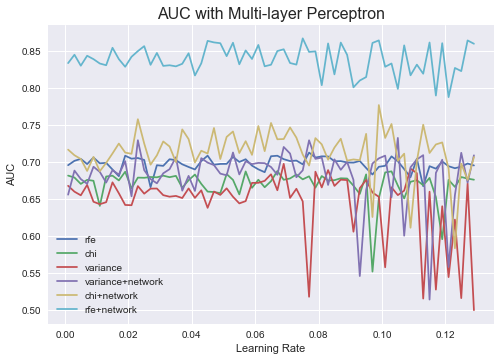

In [54]:
plt.plot(x,auc_r_rfe,label='rfe')
#plt.plot(x,auc_r_base,label='raw_data')
plt.plot(x,auc_r_chi,label='chi')
plt.plot(x,auc_r_var,label='variance')
plt.plot(x,auc_r_var_n,label='variance+network')
plt.plot(x,auc_r_chi_n,label='chi+network')
plt.plot(x,auc_r_rfe_n,label='rfe+network')
plt.legend()

plt.title("AUC with Multi-layer Perceptron",fontsize=16)
plt.xlabel('Learning Rate')
plt.ylabel('AUC')

plt.show()

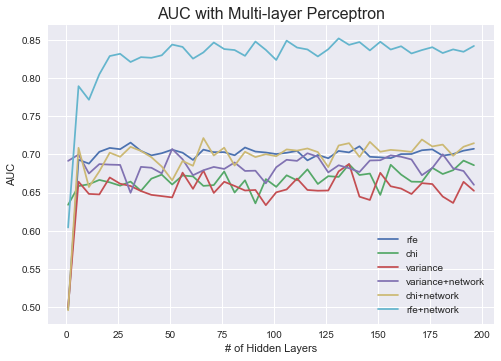

In [59]:
x=range(1,200,5)

plt.plot(x,auc_r_rfe,label='rfe')
#plt.plot(x,auc_r_base,label='raw_data')
plt.plot(x,auc_r_chi,label='chi')
plt.plot(x,auc_r_var,label='variance')
plt.plot(x,auc_r_var_n,label='variance+network')
plt.plot(x,auc_r_chi_n,label='chi+network')
plt.plot(x,auc_r_rfe_n,label='rfe+network')
plt.legend()
plt.title("AUC with Multi-layer Perceptron",fontsize=16)
plt.xlabel('# of Hidden Layers')
plt.ylabel('AUC')
plt.show()

/Users/chenbo/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [71]:
confusion_matrix(y_test_rfe_n,knn_rfe_n.predict(X_test_rfe_n))

array([[ 236,  376],
       [ 100, 2648]])

In [77]:
val(y_test_var_n,knn_var_n,X_test_var_n)

             precision    recall  f1-score   support

      False       0.45      0.14      0.21       153
       True       0.83      0.96      0.89       687

avg / total       0.76      0.81      0.77       840

0.811904761905
0.700806766181


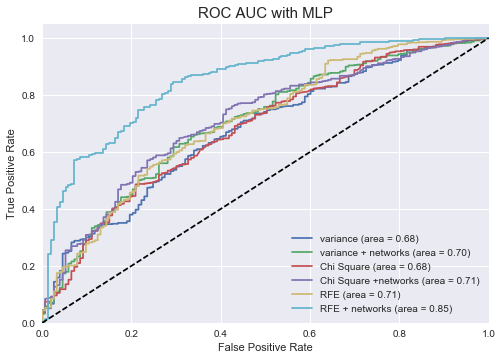

In [96]:
fpr_v, tpr_v, _ = roc_curve(y_test_var,mlp_var.predict_proba(X_test_var)[:,1])
roc_auc_v = auc(fpr_v, tpr_v)

fpr_v_n, tpr_v_n, _ = roc_curve(y_test_var_n,mlp_var_n.predict_proba(X_test_var_n)[:,1])
roc_auc_v_n = auc(fpr_v_n, tpr_v_n)

fpr_d, tpr_d, _ = roc_curve(y_test_chi,mlp_chi.predict_proba(X_test_chi)[:,1])
roc_auc_d = auc(fpr_d, tpr_d)

fpr_d_n, tpr_d_n, _ = roc_curve(y_test_chi_n,mlp_chi_n.predict_proba(X_test_chi_n)[:,1])
roc_auc_d_n = auc(fpr_d_n, tpr_d_n)

fpr_q, tpr_q, _ = roc_curve(y_test_var,mlp_rfe.predict_proba(X_test_rfe)[:,1])
roc_auc_q = auc(fpr_q, tpr_q)

fpr_q_n, tpr_q_n, _ = roc_curve(y_test_var_n,mlp_rfe_n.predict_proba(X_test_rfe_n)[:,1])
roc_auc_q_n = auc(fpr_q_n, tpr_q_n)

plt.figure()
#plt.plot(fpr_g, tpr_g, label='Bas_Model (area = %0.2f)' % roc_auc_g)
plt.plot(fpr_v, tpr_v, label='variance (area = %0.2f)' % roc_auc_v)
plt.plot(fpr_v_n, tpr_v_n, label='variance + networks (area = %0.2f)' % roc_auc_v_n)
plt.plot(fpr_d, tpr_d, label='Chi Square (area = %0.2f)' % roc_auc_d)
plt.plot(fpr_d_n, tpr_d_n, label='Chi Square +networks (area = %0.2f)' % roc_auc_d_n)
plt.plot(fpr_q, tpr_q, label='RFE (area = %0.2f)' % roc_auc_q)
plt.plot(fpr_q_n, tpr_q_n, label='RFE + networks (area = %0.2f)' % roc_auc_q_n)




plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC with MLP',fontsize=15)
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#rf_base = RandomForestClassifier().fit(X_train_base,y_train_base) 
rf_var = RandomForestClassifier().fit(X_train_var,y_train_var) 
rf_rfe = RandomForestClassifier().fit(X_train_rfe,y_train_rfe) 
rf_chi = RandomForestClassifier().fit(X_train_chi,y_train_chi) 


rf_var_n = RandomForestClassifier().fit(X_train_var_n,y_train_var_n) 
rf_rfe_n = RandomForestClassifier().fit(X_train_rfe_n,y_train_rfe_n) 
rf_chi_n = RandomForestClassifier().fit(X_train_chi_n,y_train_chi_n) 


In [104]:
confusion_matrix(y_test_rfe_n,rf_rfe_n.predict(X_test_rfe_n))

array([[ 376,  236],
       [ 120, 2628]])

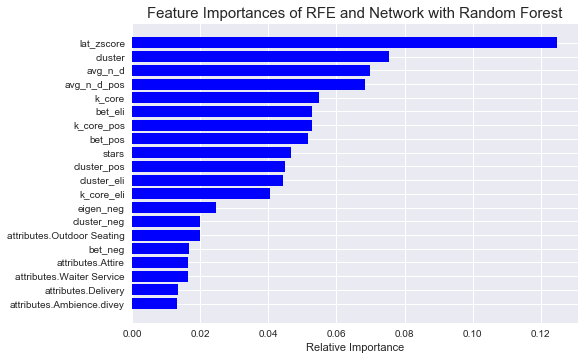

In [388]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import load_iris
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
#iris = load_iris()
#df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
#df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
 
#train, test = df[df['is_train']==True], df[df['is_train']==False]
features = np.array(rfe.columns)

 
preds = rf_rfe.predict(X_test_rfe)
#print(pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds']))
 
importances = rf_rfe.feature_importances_
indices = np.argsort(importances)
 
plt.figure(1)
plt.title('Feature Importances of RFE and Network with Random Forest',fontsize=15)
plt.barh(range(len(indices[23:])), importances[indices][23:], color='b', align='center')
plt.yticks(range(len(indices[23:])), features[indices][23:])
plt.xlabel('Relative Importance')
plt.show()

In [122]:

for i,j in enumerate(importances[indices]):
    print(i,j)

0 0.0
1 8.32479481835e-06
2 0.00142704947362
3 0.00248141547645
4 0.00438969525636
5 0.00553469992561
6 0.00605367806609
7 0.00676145593019
8 0.0075082869322
9 0.00806613585345
10 0.00839247355547
11 0.00879137895454
12 0.00894840362145
13 0.0091128116753
14 0.010322445097
15 0.0113208063147
16 0.0115332453092
17 0.011996317248
18 0.0142767983701
19 0.0175436983149
20 0.0236366407877
21 0.0245712571043
22 0.0276611146876
23 0.0315196502427
24 0.0322909721392
25 0.0322983279575
26 0.035354396405
27 0.036025838163
28 0.0959376543767
29 0.506235027967


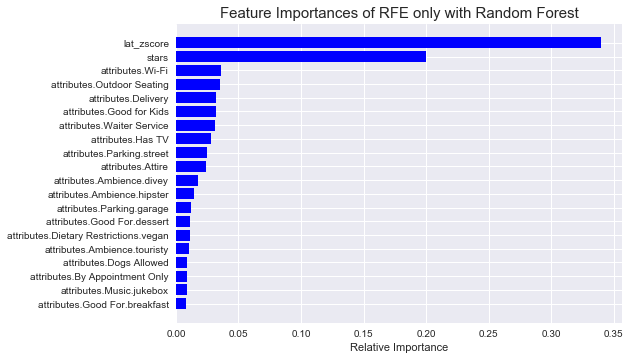

In [151]:
features = np.array(rfe.columns)

 
preds = rf_rfe.predict(X_test_rfe)
#print(pd.crosstab(index=test['species'], columns=preds, rownames=['actual'], colnames=['preds']))
 
importances = rf_rfe.feature_importances_
indices = np.argsort(importances)
 
plt.figure(1)
plt.title('Feature Importances of RFE only with Random Forest',fontsize=15)
plt.barh(range(len(indices[10:])), i, color='b', align='center')
plt.yticks(range(len(indices[10:])), features[indices][10:])
plt.xlabel('Relative Importance')
plt.show()

In [157]:
val(y_test_rfe_n,rf_rfe_n,X_test_rfe_n)

             precision    recall  f1-score   support

      False       0.76      0.61      0.68       153
       True       0.92      0.96      0.94       687

avg / total       0.89      0.89      0.89       840

0.894047619048
0.886734024032


In [ ]:
import numpy as np
def print_top10(train, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = list(train.columns)
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-5:]
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))

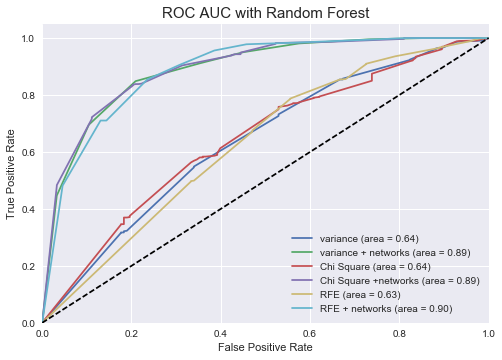

In [160]:
fpr_v, tpr_v, _ = roc_curve(y_test_var,rf_var.predict_proba(X_test_var)[:,1])
roc_auc_v = auc(fpr_v, tpr_v)

fpr_v_n, tpr_v_n, _ = roc_curve(y_test_var_n,rf_var_n.predict_proba(X_test_var_n)[:,1])
roc_auc_v_n = auc(fpr_v_n, tpr_v_n)

fpr_d, tpr_d, _ = roc_curve(y_test_chi,rf_chi.predict_proba(X_test_chi)[:,1])
roc_auc_d = auc(fpr_d, tpr_d)

fpr_d_n, tpr_d_n, _ = roc_curve(y_test_chi_n,rf_chi_n.predict_proba(X_test_chi_n)[:,1])
roc_auc_d_n = auc(fpr_d_n, tpr_d_n)

fpr_q, tpr_q, _ = roc_curve(y_test_var,rf_rfe.predict_proba(X_test_rfe)[:,1])
roc_auc_q = auc(fpr_q, tpr_q)

fpr_q_n, tpr_q_n, _ = roc_curve(y_test_var_n,rf_rfe_n.predict_proba(X_test_rfe_n)[:,1])
roc_auc_q_n = auc(fpr_q_n, tpr_q_n)
roc_auc_q_n =0.90

plt.figure()
#plt.plot(fpr_g, tpr_g, label='Bas_Model (area = %0.2f)' % roc_auc_g)
plt.plot(fpr_v, tpr_v, label='variance (area = %0.2f)' % roc_auc_v)
plt.plot(fpr_v_n, tpr_v_n, label='variance + networks (area = %0.2f)' % roc_auc_v_n)
plt.plot(fpr_d, tpr_d, label='Chi Square (area = %0.2f)' % roc_auc_d)
plt.plot(fpr_d_n, tpr_d_n, label='Chi Square +networks (area = %0.2f)' % roc_auc_d_n)
plt.plot(fpr_q, tpr_q, label='RFE (area = %0.2f)' % roc_auc_q)
plt.plot(fpr_q_n, tpr_q_n, label='RFE + networks (area = %0.2f)' % roc_auc_q_n)




plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC with Random Forest',fontsize=15)
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.metrics import accuracy_score,f1_score
def val(t,model,test_data):
    print(classification_report(t, model.predict(test_data)))
    print(accuracy_score(t, model.predict(test_data)))
    fpr_g, tpr_g, _ = roc_curve(t,model.predict_proba(test_data)[:,1])
    print(auc(fpr_g, tpr_g))
    
    
    


In [411]:
val(y_test_rfe,rf_rfe,X_test_rfe)

             precision    recall  f1-score   support

      False       0.80      0.62      0.70       153
       True       0.92      0.97      0.94       687

avg / total       0.90      0.90      0.90       840

0.902380952381
0.888075463082


In [225]:
confusion_matrix(y_test_rfe,knn_rfe.predict(X_test_rfe))*4

array([[ 248,  364],
       [  76, 2672]])

# Chi-Square test between model fit and networks

In [164]:
import scipy.stats as ss
# import scipy.stats as stats
ss.chi2_contingency([[0,5,4],[7,2,0]])

(12.285714285714285, 0.0021487754809097238, 2, array([[ 3.5,  3.5,  2. ],
        [ 3.5,  3.5,  2. ]]))